# Map Projections

In this notebook, you can create various mapping projections that are available in the altair package. Based on the full Altair doumentation found here: https://altair-viz.github.io/gallery/world_projections.html

In [1]:
# Import the required packages depending on environment
import altair as alt
import selenium, sys

from vega_datasets import data 
if ('google.colab' in sys.modules)==False:
    alt.renderers.enable('notebook')

### World Maps & Projections

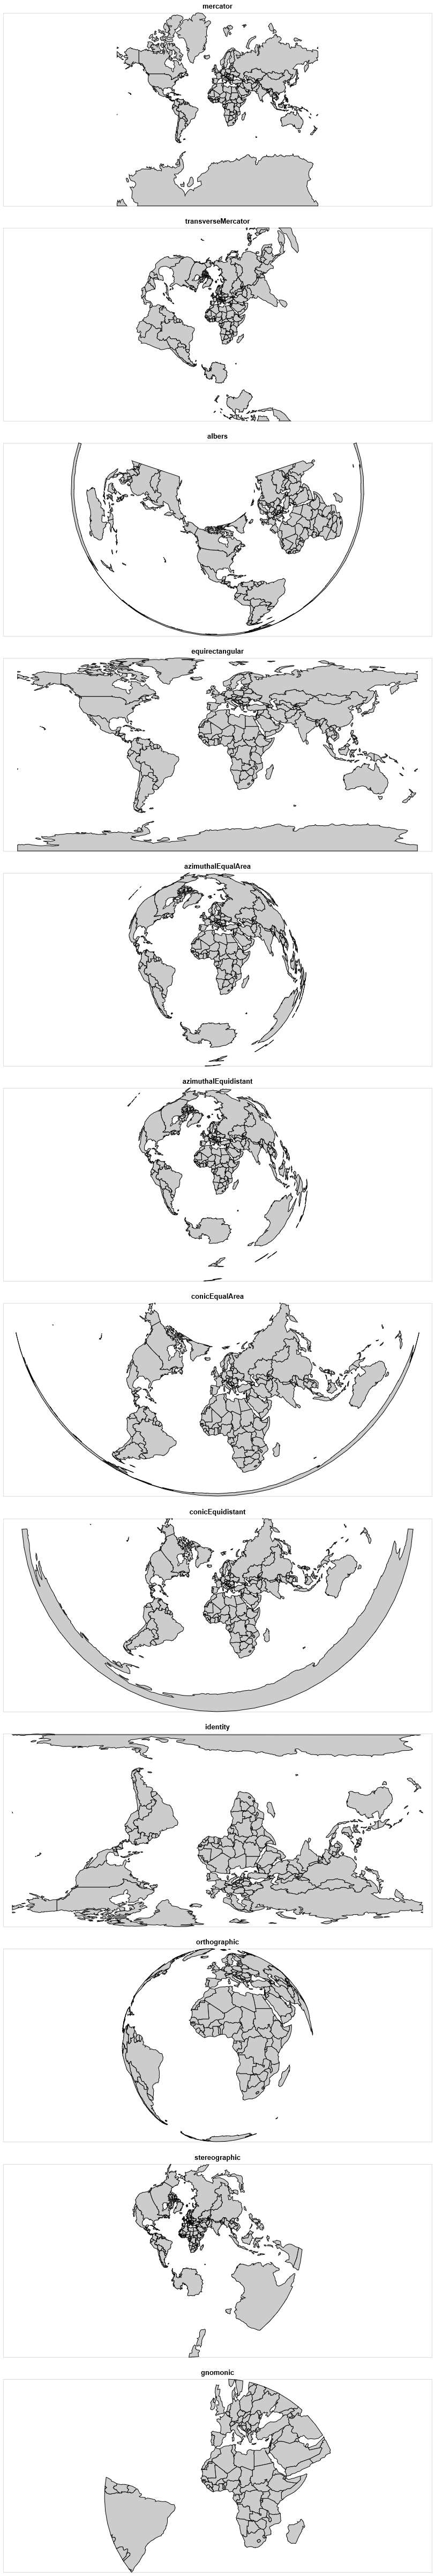

In [2]:
'''
Define the source for our geo data as well as the the type of features
you would like plotted (countries, states, counties). This is dependent
on the features that are available
'''
source = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(source).mark_geoshape(
    fill='#cccccc',
    stroke='black'
).properties(
    width=800,
    height=360
)

projections = ['mercator',
               'transverseMercator',
               'albers',
               'equirectangular', 
               'azimuthalEqualArea',
               'azimuthalEquidistant',
               'conicEqualArea',
               'conicEquidistant',
               'identity',
               'orthographic',
               'stereographic',
               'gnomonic']

charts = [base.project(proj).properties(title=proj)
          for proj in projections]

# Uncomment the line below to export a vega JSON of the map
# The saved JSON can be rendered and viewed here: https://vega.github.io/editor/#/edited
#export = [base.project(proj).properties(title=proj).save(proj+'.json')
#          for proj in projections]

alt.concat(*charts, columns=1)

### US State Level - Albers' Projection

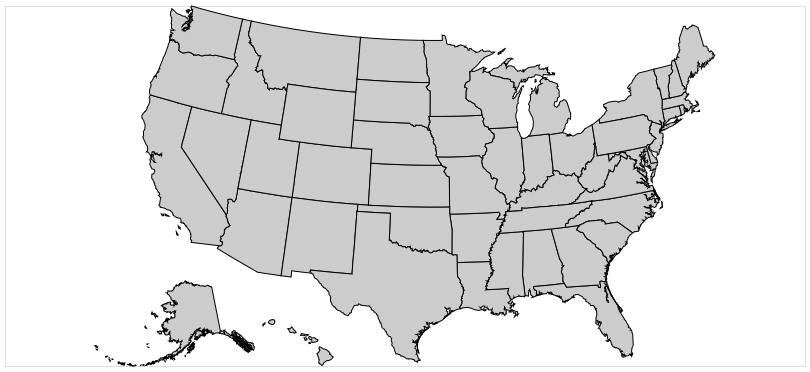

In [3]:
source = alt.topo_feature(data.us_10m.url, 'states')

base = alt.Chart(source).mark_geoshape(
    fill='#cccccc',
    stroke='black'
).properties(
    width=800,
    height=360
).project('albersUsa')

# Uncomment the line below to export a vega JSON of the map
# The saved JSON can be rendered and viewed here: https://vega.github.io/editor/#/edited
base.save('albers_state.json')

base

### US Counties Level -  Albers' Projection

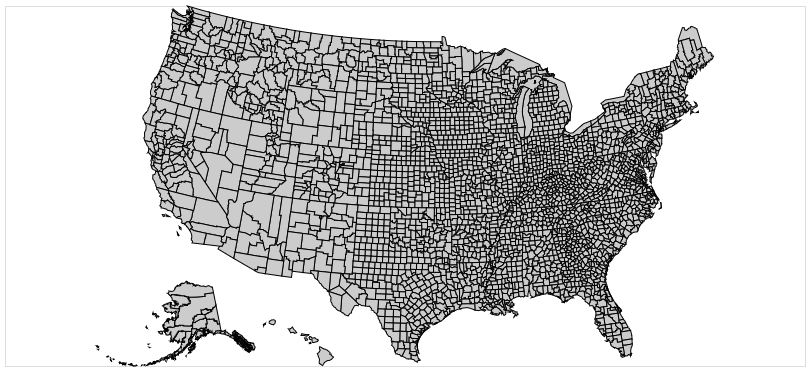

In [4]:
source = alt.topo_feature(data.us_10m.url, 'counties')

base = alt.Chart(source).mark_geoshape(
    fill='#cccccc',
    stroke='black'
).properties(
    width=800,
    height=360
).project('albersUsa')

# Uncomment the line below to export a vega JSON of the map
# The saved JSON can be rendered and viewed here: https://vega.github.io/editor/#/edited
# base.save('albers_county.json')

base